In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Task - 1: Import the "Retail_Sales_Data.csv" dataset.

In [9]:
df = pd.read_csv("Retail_Sales_Data.csv")

# Task - 2: Explore the dataset to understand its structure and content.

In [12]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [14]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [18]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [20]:
# Check for missing values
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

# Task - 3: Identify the relevant variables for aggregating sales data, such as region, sales amount, and product category.

In [45]:
# Step 1: Identify relevant columns
relevant_columns = ["shopping_mall", "price", "category"]
data = data[relevant_columns]
data

,shopping_mall,price,category
0,Kanyon,1500.40,Clothing
1,Forum Istanbul,1800.51,Shoes
2,Metrocity,300.08,Clothing
3,Metropol AVM,3000.85,Shoes
4,Kanyon,60.60,Books
...,...,...,...
99452,Kanyon,58.65,Souvenir
99453,Forum Istanbul,10.46,Food & Beverage
99454,Metrocity,10.46,Food & Beverage
99455,Istinye Park,4200.00,Technology


# Task - 4: Group the sales data by region and calculate the total sales amount for each region

In [48]:
# Step 2: Group by 'shopping_mall' and calculate the total sales amount
sales_by_region = data.groupby("shopping_mall")["price"].sum()

# Display the result
print(sales_by_region)

shopping_mall
Cevahir AVM           3433671.84
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Istinye Park          6717077.54
Kanyon               13710755.24
Mall of Istanbul     13851737.62
Metrocity            10249980.07
Metropol AVM          6937992.99
Viaport Outlet        3414019.46
Zorlu Center          3509649.02
Name: price, dtype: float64


# Task -5: Create bar plots or pie charts to visualize the sales distribution by region.

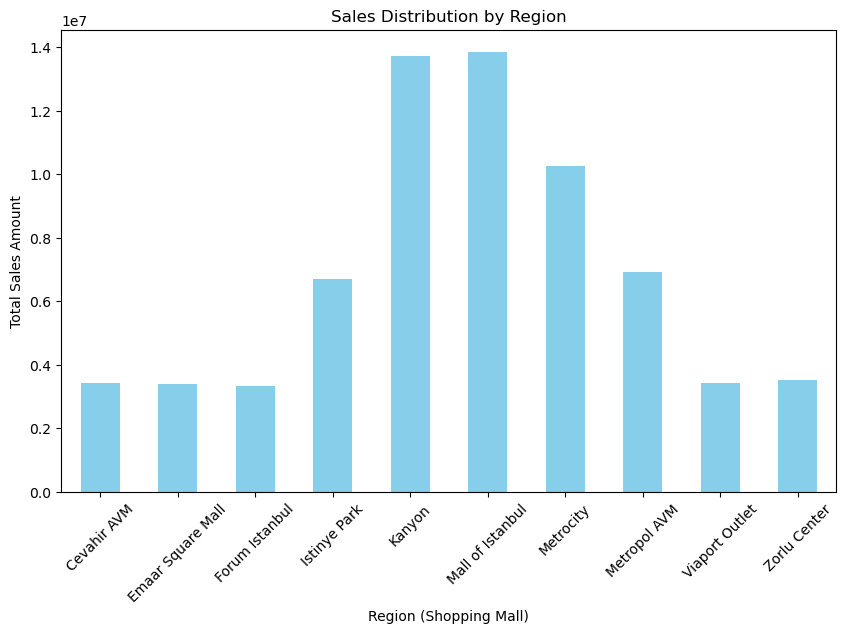

In [53]:
# Plot a bar chart of sales distribution by region
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title("Sales Distribution by Region")
plt.xlabel("Region (Shopping Mall)")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

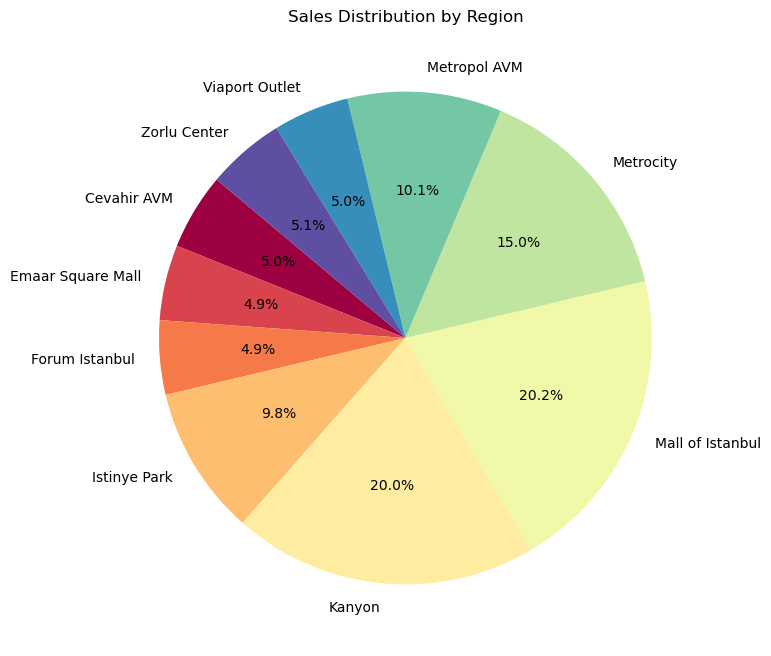

In [57]:
# Plot a pie chart of sales distribution by region
plt.figure(figsize=(8, 8))
sales_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Spectral')
plt.title("Sales Distribution by Region")
plt.ylabel("")  # Hide y-label for pie chart
plt.show()

# Task - 6: Identify the top-performing regions based on the highest sales amount.

In [60]:
# Sort the sales data by total sales amount in descending order to identify top-performing regions
top_performing_regions = sales_by_region.sort_values(ascending=False)

# Display the top-performing regions
print(top_performing_regions)

shopping_mall
Mall of Istanbul     13851737.62
Kanyon               13710755.24
Metrocity            10249980.07
Metropol AVM          6937992.99
Istinye Park          6717077.54
Zorlu Center          3509649.02
Cevahir AVM           3433671.84
Viaport Outlet        3414019.46
Emaar Square Mall     3390408.31
Forum Istanbul        3336073.82
Name: price, dtype: float64


# Task - 7: Group the sales data by region and product category to calculate the total sales amount for each combination

In [67]:
# Group the sales data by region (shopping_mall) and product category, and calculate the total sales amount
sales_by_region_category = data.groupby(["shopping_mall", "category"])["price"].sum()

# Display the result
print(sales_by_region_category)

shopping_mall  category       
Cevahir AVM    Books                11998.80
               Clothing           1554414.40
               Cosmetics            88394.84
               Food & Beverage      11992.39
               Shoes               884050.41
                                     ...    
Zorlu Center   Food & Beverage      11589.68
               Shoes               953670.13
               Souvenir              8398.68
               Technology          803250.00
               Toys                 54691.84
Name: price, Length: 80, dtype: float64


# Task - 8 : Create stacked bar plots or grouped bar plots to compare the sales amounts across different regions and product categories.

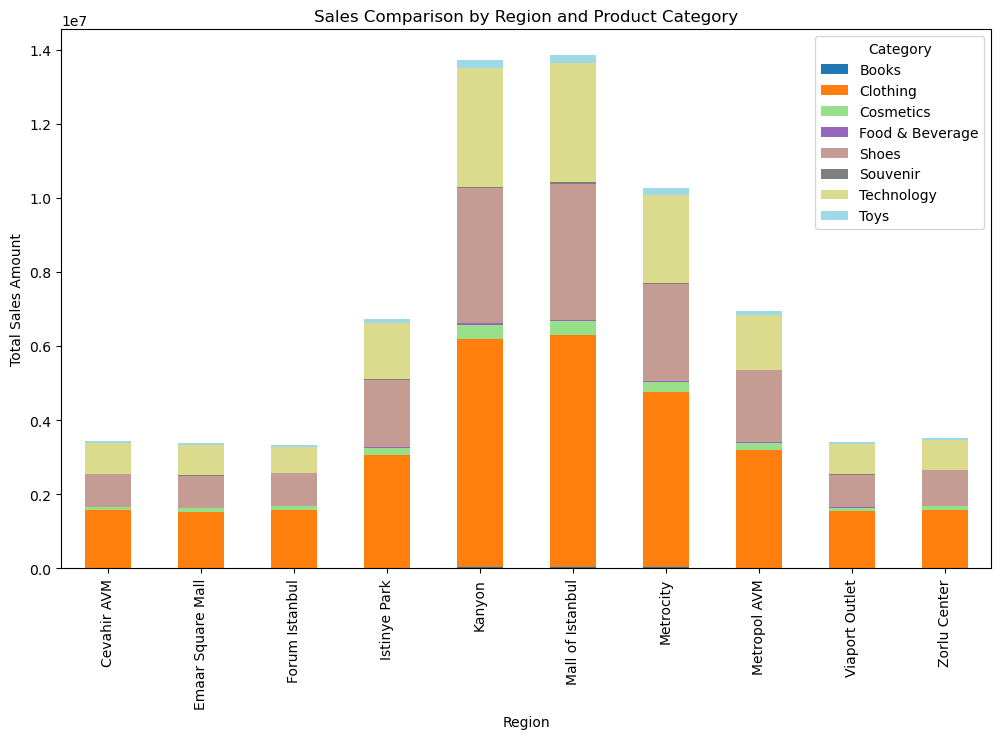

In [72]:
#Create a stacked bar plot to compare sales across regions and categories
sales_by_region_category.unstack().plot(kind="bar", stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Sales Comparison by Region and Product Category")
plt.xlabel("Region")
plt.ylabel("Total Sales Amount")
plt.legend(title="Category")
plt.show()